In this file:
 Histograms (Bobby)
     a. Each score
     b. Democracy index
     c. Each control

Heatmap correlation (Bobby)

Final implications and biggest takeaways. (Bobby)

In [1]:
import matplotlib.pyplot as plt
import os
plt.show = plt.show

# Histogram Generation

In [2]:
# Preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

wvs_data = pd.read_csv("/Users/robertcupps/109a project/cs109a-project/cs109a-project/cleaned_data/cleaned_wvs_data.csv")
wvs_data.columns
important_cols = ['work_ethic', 'trust', 'equality',
       'religion']

total_range = wvs_data[important_cols].max() - wvs_data[important_cols].min()
total_range

controls_data = pd.read_csv("/Users/robertcupps/109a project/cs109a-project/cs109a-project/cleaned_data/controls_data.csv")
# I am add to waves so that they cover all of time from 1995.
# Assumption, associate data back one wave if is not in a wave. 
waves = {1:[2005, 2009], 2:[2010, 2014], 3:[2017, 2022]}

In [3]:
wvs_data['Year'].min()

np.int64(2005)

### Each Score

Work Ethic Hists

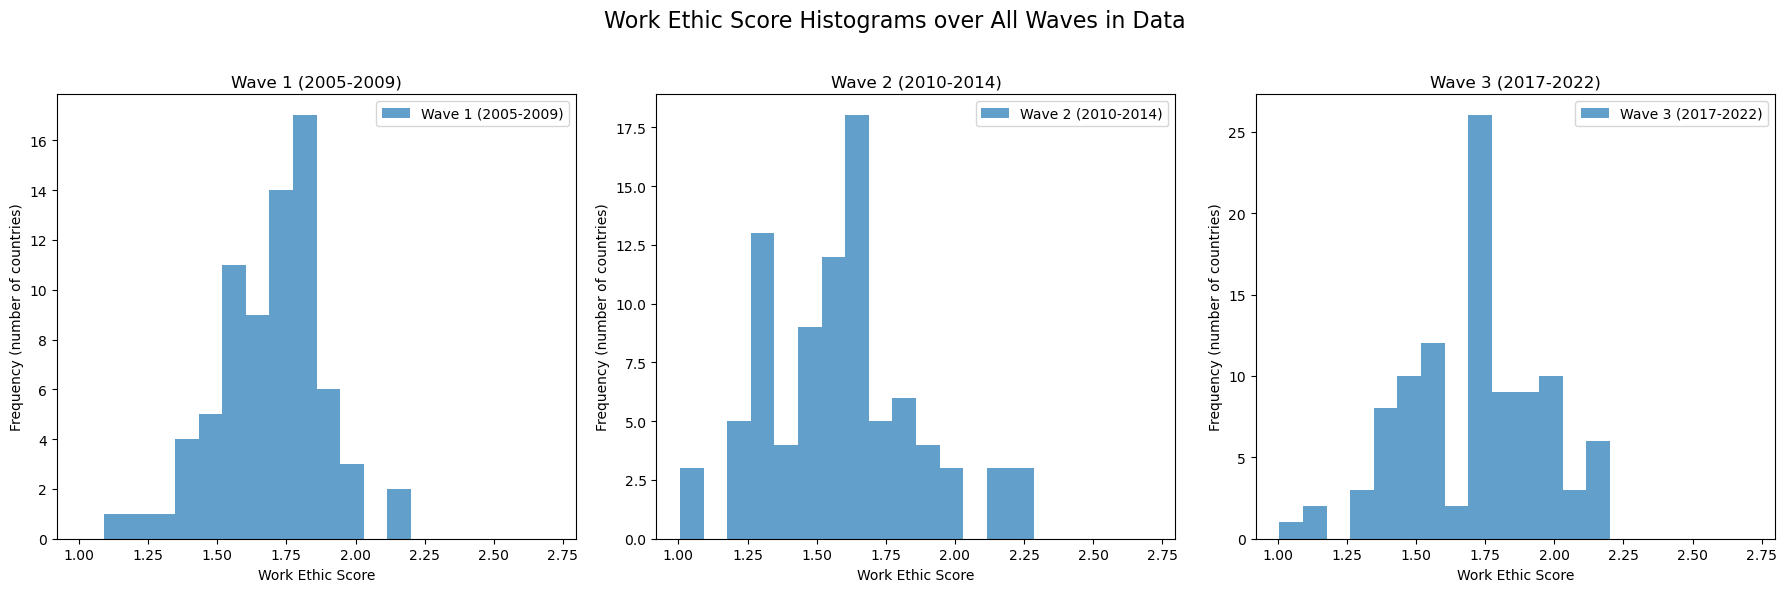

In [4]:
import matplotlib.pyplot as plt

# Define the range for the x-axis
x_range_work_ethic = (wvs_data['work_ethic'].min(), wvs_data['work_ethic'].max())

# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Work Ethic Score Histograms over All Waves in Data', fontsize=16)

# Create histograms for trust score over the 3 waves
for i, (wave, years) in enumerate(waves.items()):
    data_wave = wvs_data[(wvs_data['Year'] >= years[0]) & (wvs_data['Year'] <= years[1])]
    axes[i].hist(data_wave['work_ethic'], bins=20, alpha=0.7, range=x_range_work_ethic, label=f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].set_xlabel('Work Ethic Score')
    axes[i].set_ylabel('Frequency (number of countries)')
    axes[i].set_title(f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()


Trust Hists

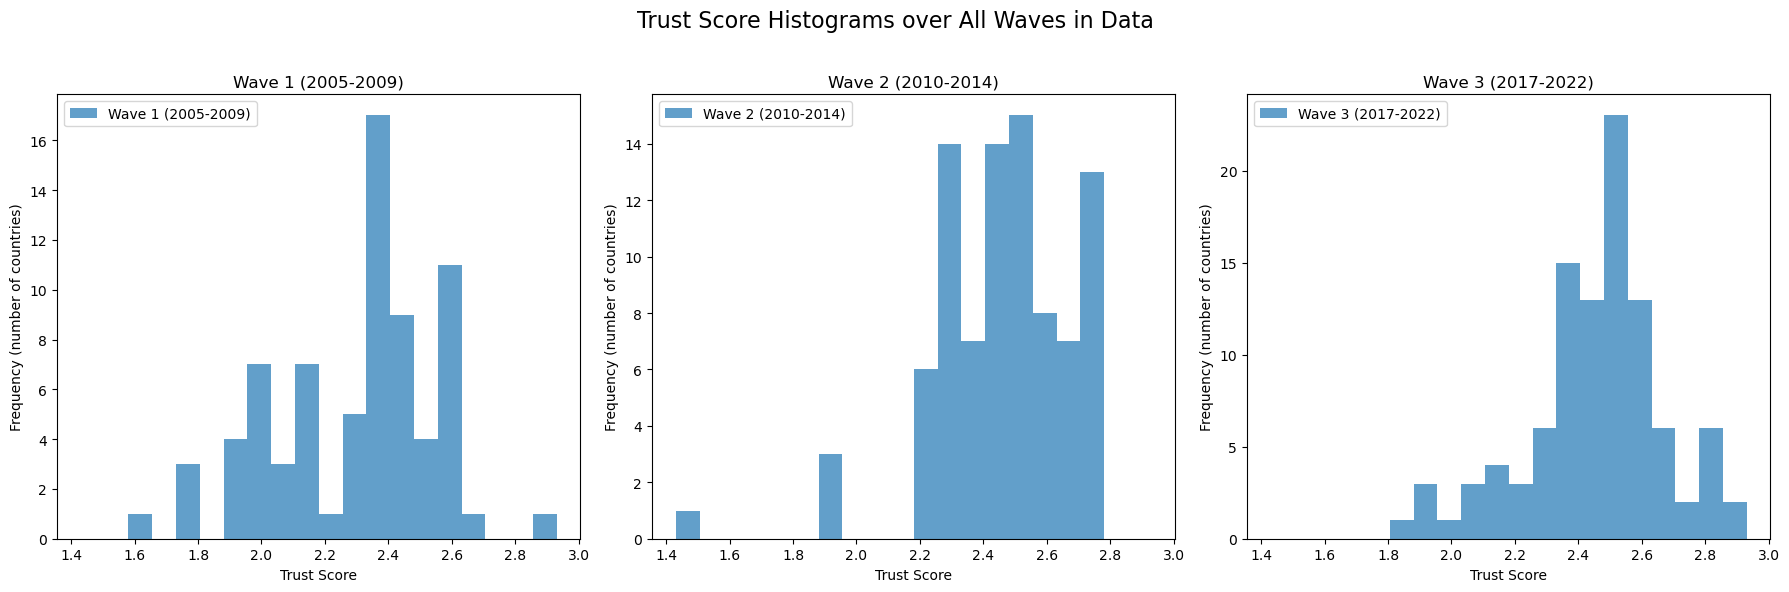

In [5]:
import matplotlib.pyplot as plt

# Define the range for the x-axis
x_range_trust = (wvs_data['trust'].min(), wvs_data['trust'].max())

# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Trust Score Histograms over All Waves in Data', fontsize=16)

# Create histograms for trust score over the 3 waves
for i, (wave, years) in enumerate(waves.items()):
    data_wave = wvs_data[(wvs_data['Year'] >= years[0]) & (wvs_data['Year'] <= years[1])]
    axes[i].hist(data_wave['trust'], bins=20, alpha=0.7, range=x_range_trust, label=f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].set_xlabel('Trust Score')
    axes[i].set_ylabel('Frequency (number of countries)')
    axes[i].set_title(f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()


Equality Hists

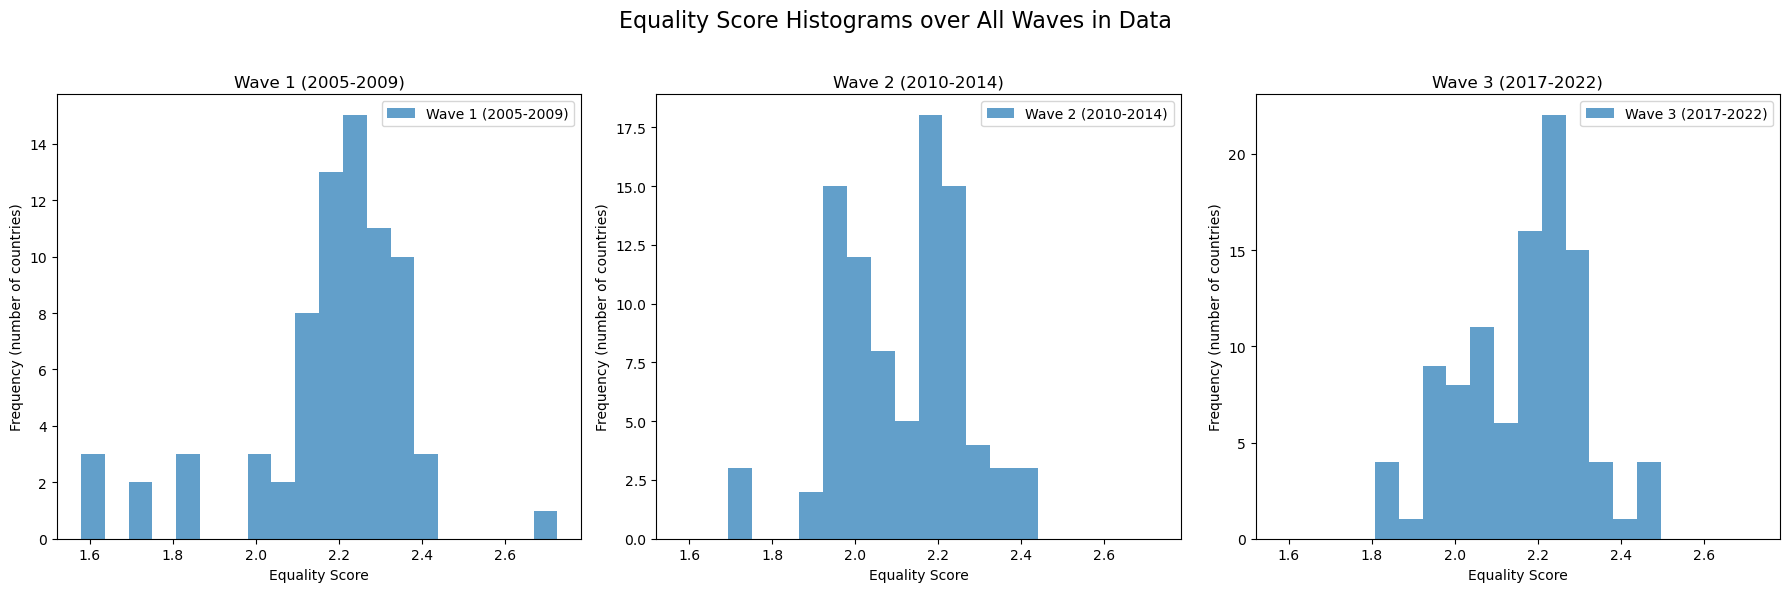

In [6]:
import matplotlib.pyplot as plt

# Define the range for the x-axis
x_range_equality = (wvs_data['equality'].min(), wvs_data['equality'].max())

# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Equality Score Histograms over All Waves in Data', fontsize=16)

# Create histograms for equality score over the 3 waves
for i, (wave, years) in enumerate(waves.items()):
    data_wave = wvs_data[(wvs_data['Year'] >= years[0]) & (wvs_data['Year'] <= years[1])]
    axes[i].hist(data_wave['equality'], bins=20, alpha=0.7, range=x_range_equality, label=f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].set_xlabel('Equality Score')
    axes[i].set_ylabel('Frequency (number of countries)')
    axes[i].set_title(f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()


Religion Hists

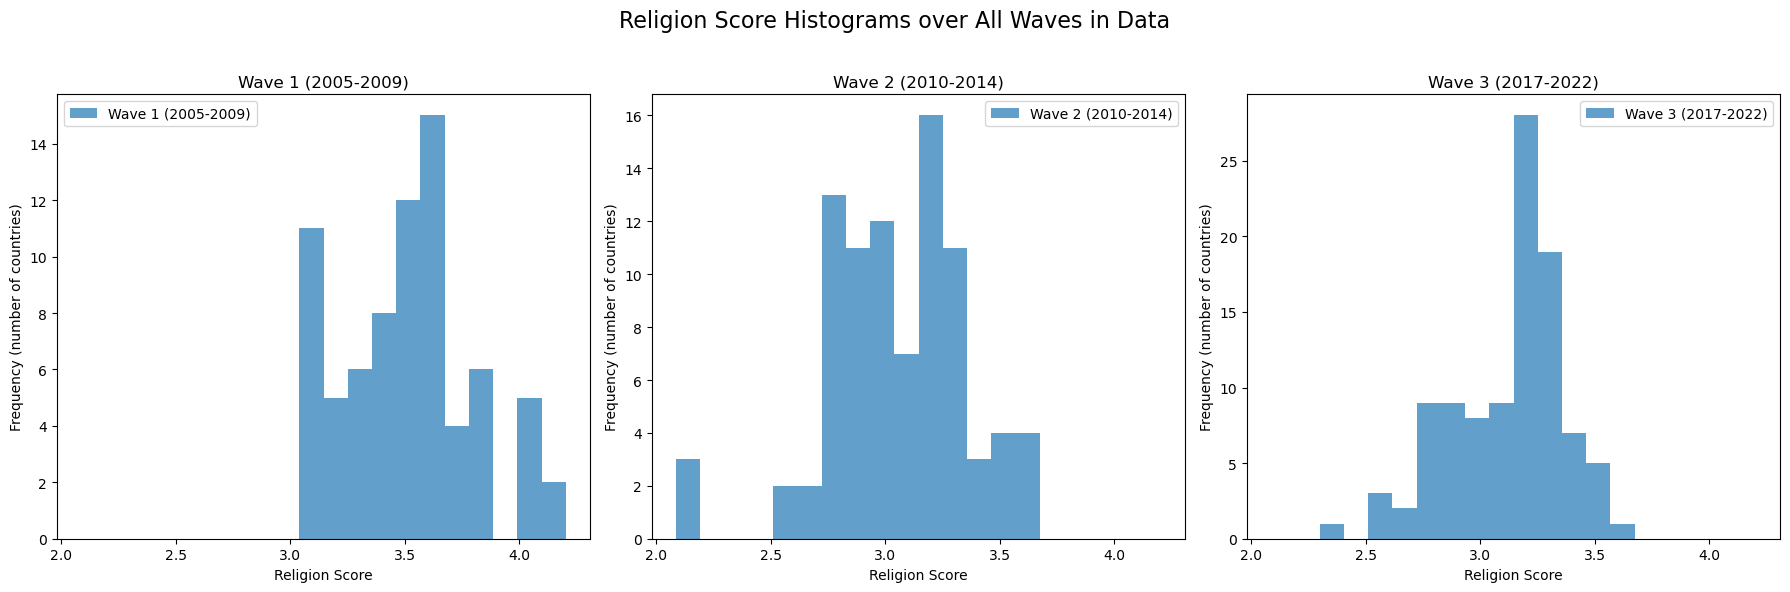

In [7]:
import matplotlib.pyplot as plt

# Define the range for the x-axis
x_range_religion = (wvs_data['religion'].min(), wvs_data['religion'].max())

# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Religion Score Histograms over All Waves in Data', fontsize=16)

# Create histograms for religion score over the 3 waves
for i, (wave, years) in enumerate(waves.items()):
    data_wave = wvs_data[(wvs_data['Year'] >= years[0]) & (wvs_data['Year'] <= years[1])]
    axes[i].hist(data_wave['religion'], bins=20, alpha=0.7, range=x_range_religion, label=f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].set_xlabel('Religion Score')
    axes[i].set_ylabel('Frequency (number of countries)')
    axes[i].set_title(f'Wave {wave} ({years[0]}-{years[1]})')
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()


### Democracy Index

These plots are done by taking the average democracy score through the wave and setting that as the democracy score for the wave. Then, a histogram is created.

In [8]:
controls_data.columns

Index(['Entity', 'Code', 'Year', 'Democracy score', 'gdp_per_capita',
       'gdp_per_capita_std', 'country', 'iso3', 'year', 'hdi'],
      dtype='object')

In [9]:
# Build averaged democracy scores for each country

democracy_data = controls_data[['country', 'Year', 'Democracy score']]
wave_1_totals = democracy_data[(democracy_data['Year'] >= 2005) & (democracy_data['Year'] <= 2009)].groupby('country').mean()
wave_2_totals = democracy_data[(democracy_data['Year'] >= 2010) & (democracy_data['Year'] <= 2016)].groupby('country').mean()
wave_3_totals = democracy_data[(democracy_data['Year'] >= 2017) & (democracy_data['Year'] <= 2022)].groupby('country').mean()
wave_1_totals.loc["Afghanistan"]

Year               2007.000
Democracy score       2.986
Name: Afghanistan, dtype: float64

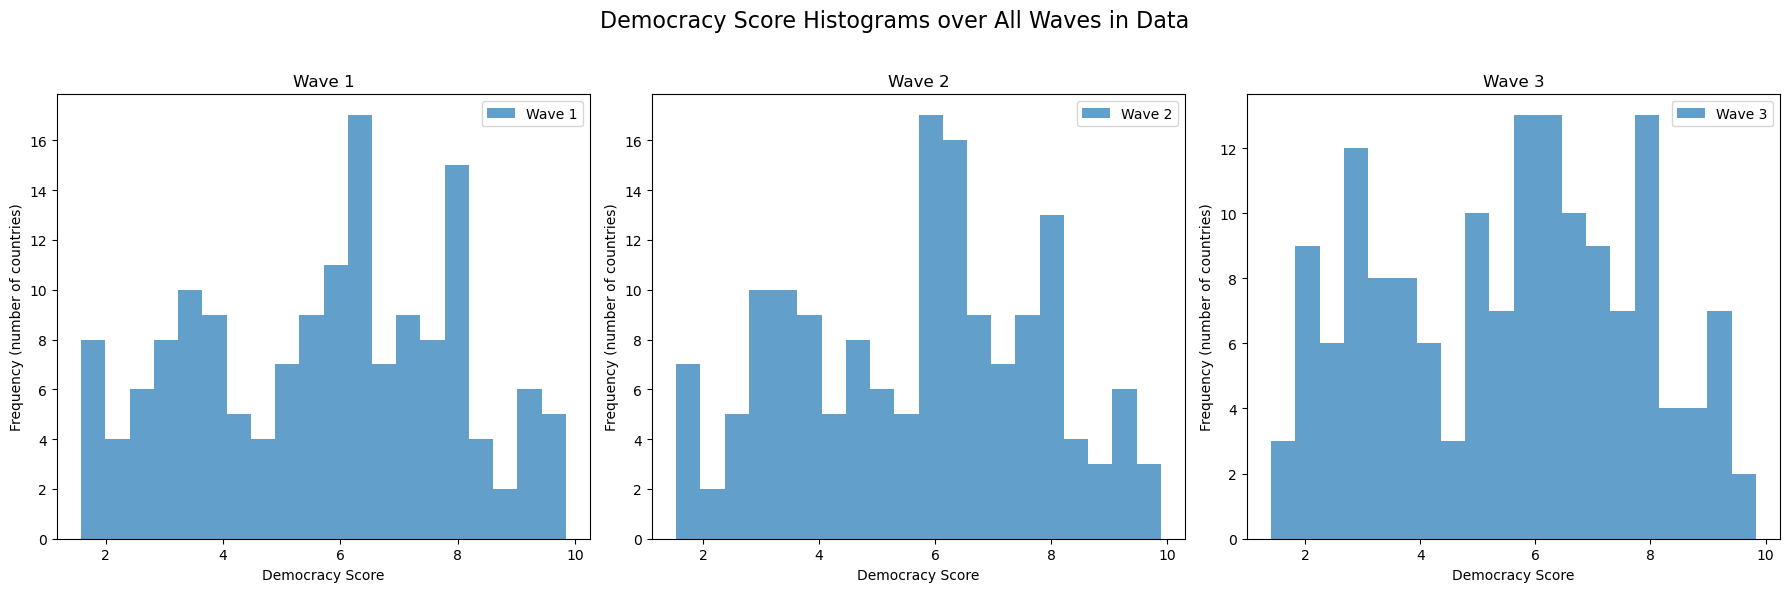

In [10]:
# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Democracy Score Histograms over All Waves in Data', fontsize=16)

# Create histograms for democracy scores over the 3 waves
for (wave_number, wave_totals) in enumerate([wave_1_totals]):
    axes[0].hist(wave_totals['Democracy score'], bins=20, alpha=0.7, label=f'Wave {1}')
    axes[0].set_xlabel('Democracy Score')
    axes[0].set_ylabel('Frequency (number of countries)')
    axes[0].set_title(f'Wave {1}')
    axes[0].legend()
for (wave_number, wave_totals) in enumerate([wave_2_totals]):
    axes[1].hist(wave_totals['Democracy score'], bins=20, alpha=0.7, label=f'Wave {2}')
    axes[1].set_xlabel('Democracy Score')
    axes[1].set_ylabel('Frequency (number of countries)')
    axes[1].set_title(f'Wave {2}')
    axes[1].legend()
for (wave_number, wave_totals) in enumerate([wave_3_totals]):
    axes[2].hist(wave_totals['Democracy score'], bins=20, alpha=0.7, label=f'Wave {3}')
    axes[2].set_xlabel('Democracy Score')
    axes[2].set_ylabel('Frequency (number of countries)')
    axes[2].set_title(f'Wave {3}')
    axes[2].legend()
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()

### Hists for each Control (gdp_per cap and sd, hdi)

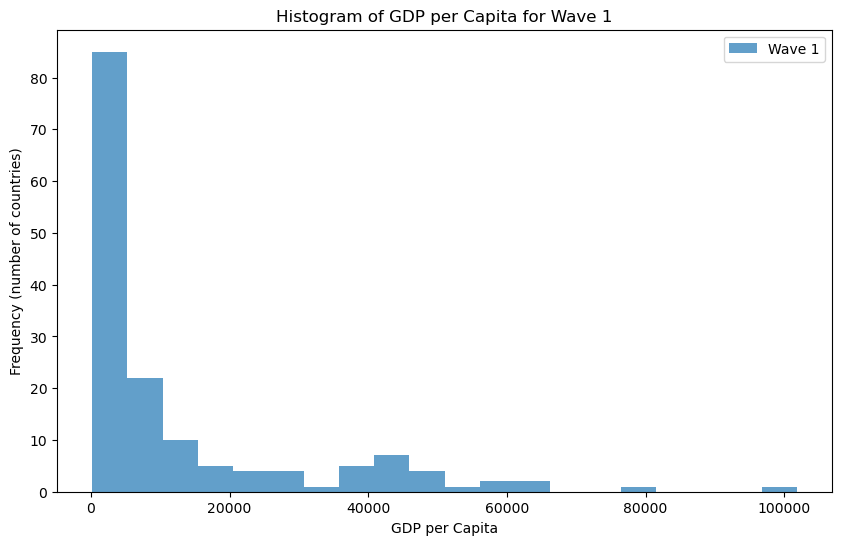

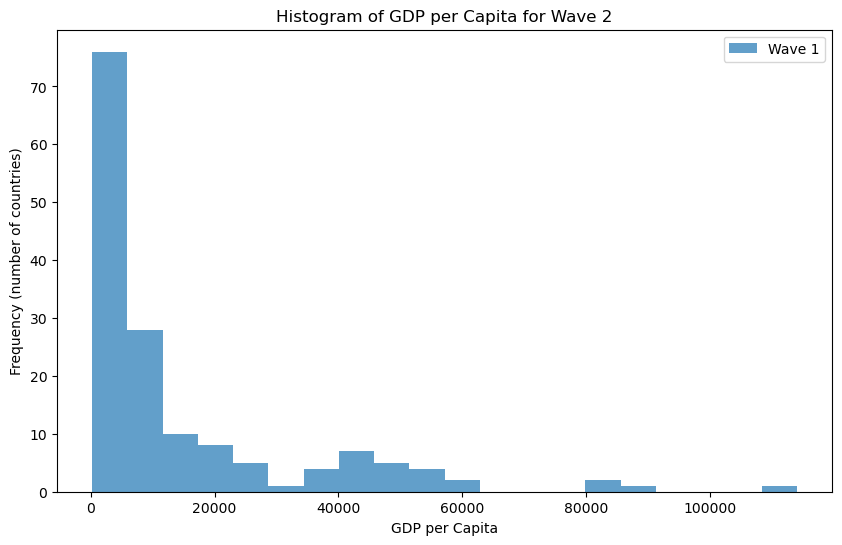

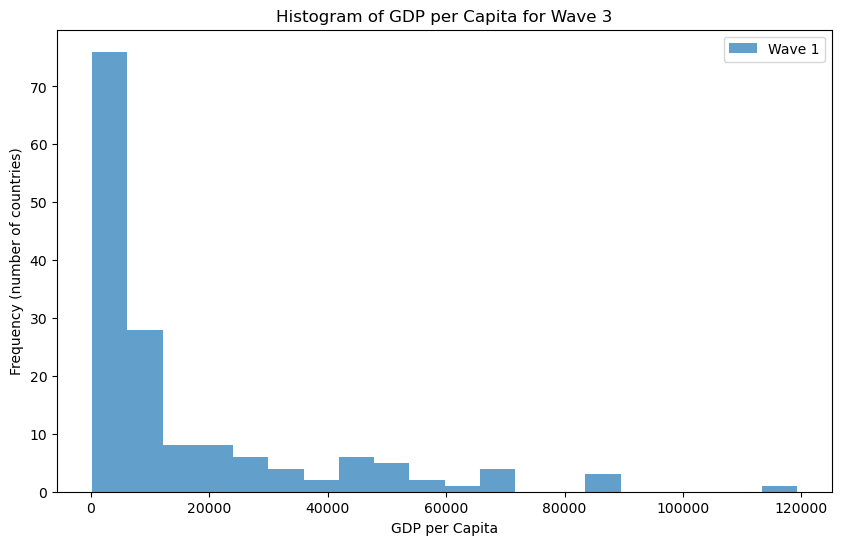

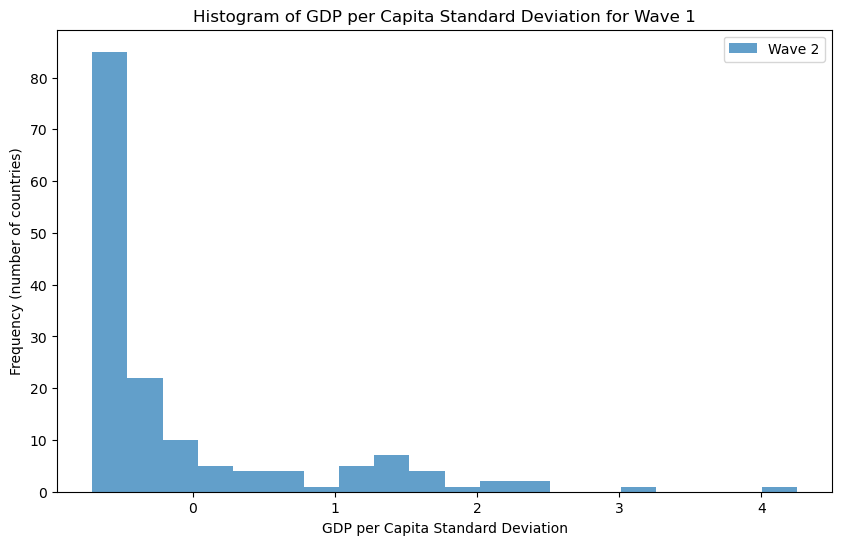

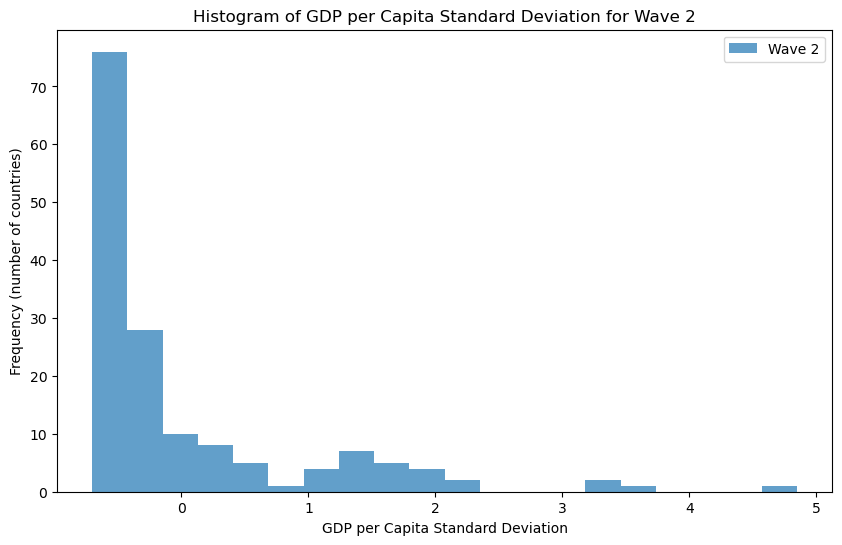

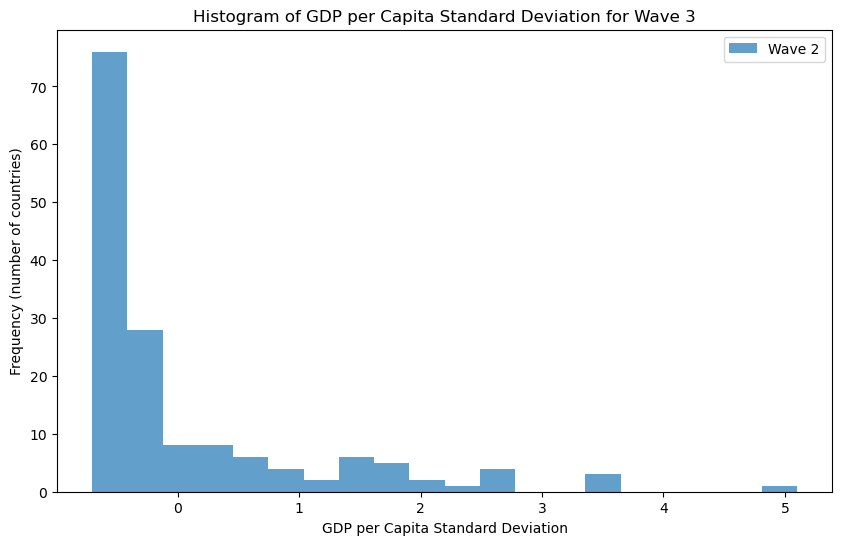

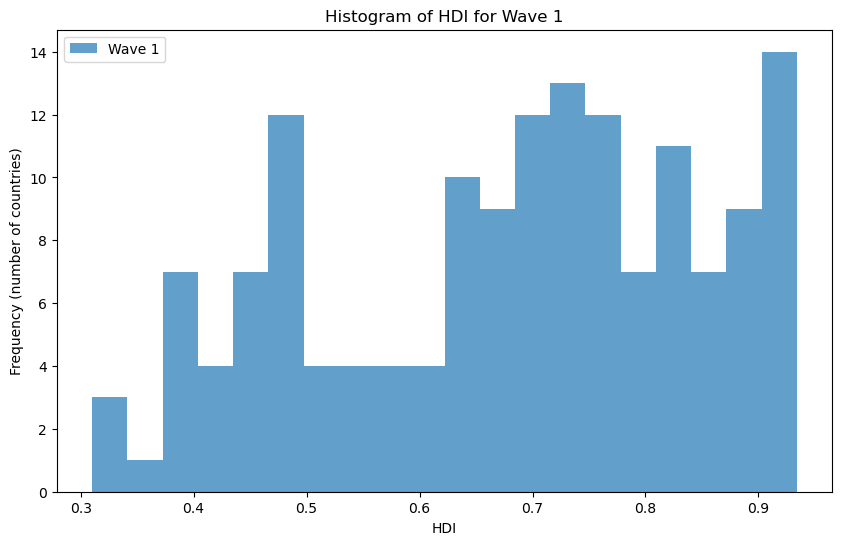

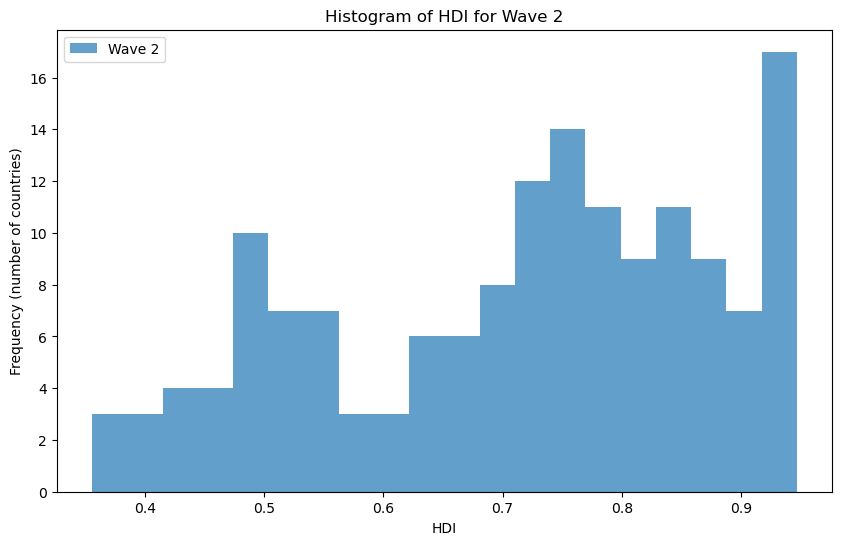

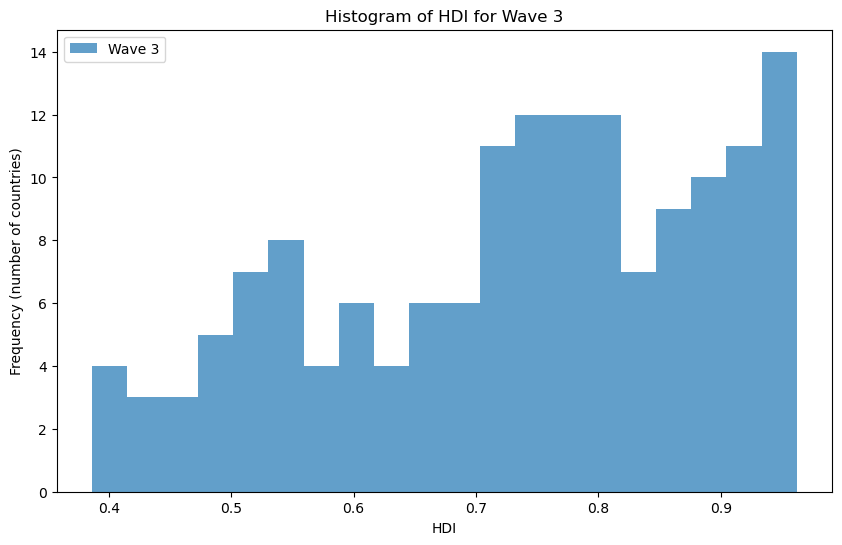

In [11]:
# Build averaged gdp_per_capita, gdp_per_capita_sd, and hdi scores for each country

gdp_data = controls_data[['country', 'Year', 'gdp_per_capita', 'gdp_per_capita_std', 'hdi']]
wave_1_gdp = gdp_data[(gdp_data['Year'] >= 2005) & (gdp_data['Year'] <= 2009)].groupby('country').mean()
wave_2_gdp = gdp_data[(gdp_data['Year'] >= 2010) & (gdp_data['Year'] <= 2016)].groupby('country').mean()
wave_3_gdp = gdp_data[(gdp_data['Year'] >= 2017) & (gdp_data['Year'] <= 2022)].groupby('country').mean()

# Create histograms for gdp_per_capita over the 3 waves
for wave, wave_gdp in enumerate([wave_1_gdp, wave_2_gdp, wave_3_gdp], start=1):
    plt.figure(figsize=(10, 6))
    plt.hist(wave_gdp['gdp_per_capita'], bins=20, alpha=0.7, label=f'Wave {1}')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Frequency (number of countries)')
    plt.title(f'Histogram of GDP per Capita for Wave {wave}')
    plt.legend()
    plt.show()

# Create histograms for gdp_per_capita_sd over the 3 waves
for wave, wave_gdp in enumerate([wave_1_gdp, wave_2_gdp, wave_3_gdp], start=1):
    plt.figure(figsize=(10, 6))
    plt.hist(wave_gdp['gdp_per_capita_std'], bins=20, alpha=0.7, label=f'Wave {2}')
    plt.xlabel('GDP per Capita Standard Deviation')
    plt.ylabel('Frequency (number of countries)')
    plt.title(f'Histogram of GDP per Capita Standard Deviation for Wave {wave}')
    plt.legend()
    plt.show()

# Create histograms for hdi over the 3 waves
for wave, wave_gdp in enumerate([wave_1_gdp, wave_2_gdp, wave_3_gdp], start=1):
    plt.figure(figsize=(10, 6))
    plt.hist(wave_gdp['hdi'], bins=20, alpha=0.7, label=f'Wave {wave}')
    plt.xlabel('HDI')
    plt.ylabel('Frequency (number of countries)')
    plt.title(f'Histogram of HDI for Wave {wave}')
    plt.legend()
    plt.show()

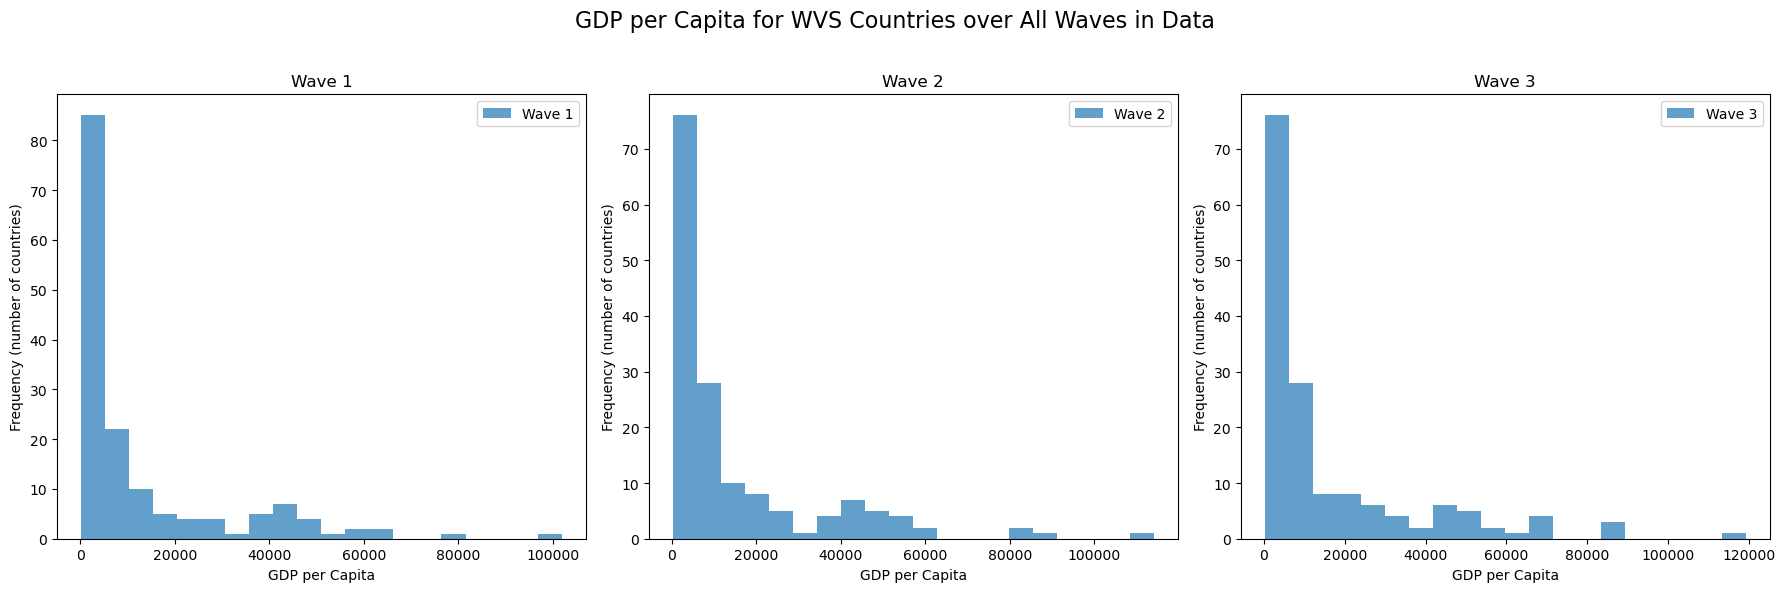

In [12]:
# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('GDP per Capita for WVS Countries over All Waves in Data', fontsize=16)

# Create histograms for GDP per Capita over the 3 waves
for wave_number, wave_gdp in enumerate([wave_1_gdp, wave_2_gdp, wave_3_gdp], start=1):
    axes[wave_number-1].hist(wave_gdp['gdp_per_capita'], bins=20, alpha=0.7, label=f'Wave {wave_number}')
    axes[wave_number-1].set_xlabel('GDP per Capita')
    axes[wave_number-1].set_ylabel('Frequency (number of countries)')
    axes[wave_number-1].set_title(f'Wave {wave_number}')
    axes[wave_number-1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()

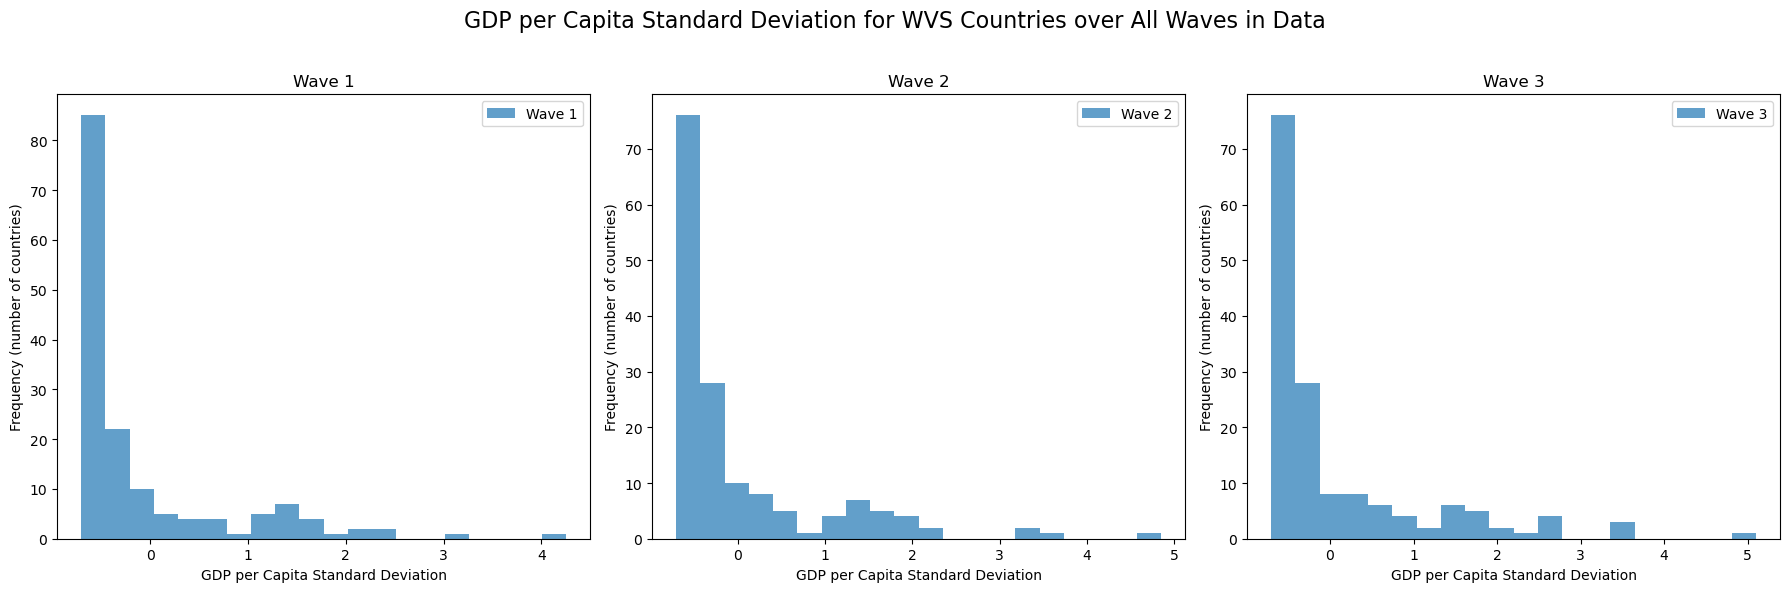

In [13]:
# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('GDP per Capita Standardized for WVS Countries over All Waves in Data', fontsize=16)

# Create histograms for GDP per Capita Standard Deviation over the 3 waves
for wave_number, wave_gdp in enumerate([wave_1_gdp, wave_2_gdp, wave_3_gdp], start=1):
    axes[wave_number-1].hist(wave_gdp['gdp_per_capita_std'], bins=20, alpha=0.7, label=f'Wave {wave_number}')
    axes[wave_number-1].set_xlabel('GDP per Capita Standardized')
    axes[wave_number-1].set_ylabel('Frequency (number of countries)')
    axes[wave_number-1].set_title(f'Wave {wave_number}')
    axes[wave_number-1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()

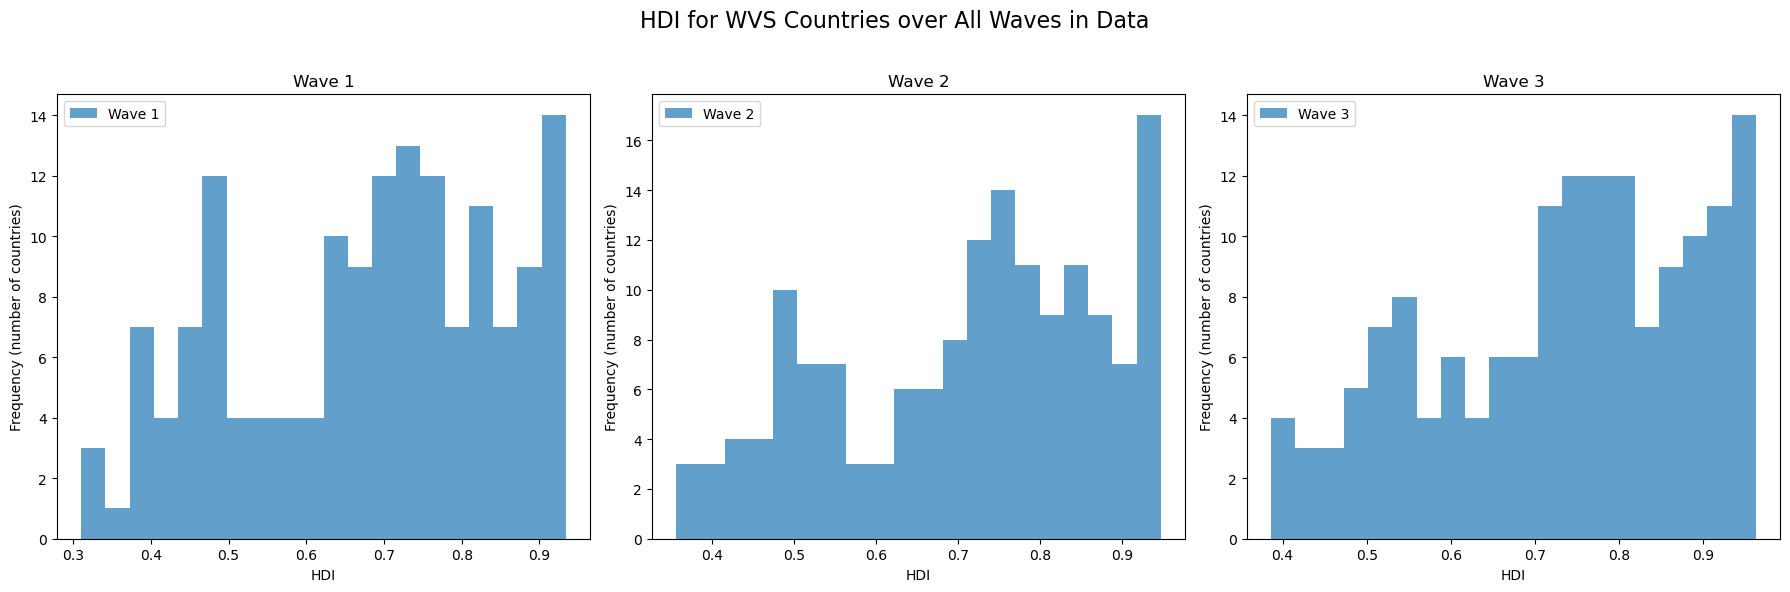

In [14]:
# Define the overall figure and subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('HDI for WVS Countries over All Waves in Data', fontsize=16)

# Create histograms for HDI over the 3 waves
for wave_number, wave_gdp in enumerate([wave_1_gdp, wave_2_gdp, wave_3_gdp], start=1):
    axes[wave_number-1].hist(wave_gdp['hdi'], bins=20, alpha=0.7, label=f'Wave {wave_number}')
    axes[wave_number-1].set_xlabel('HDI')
    axes[wave_number-1].set_ylabel('Frequency (number of countries)')
    axes[wave_number-1].set_title(f'Wave {wave_number}')
    axes[wave_number-1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the overall title
plt.show()

# HeatMap Correlation

We make a time series for each of the scores and democracy and hdi, gdp per capita that goes through all years that we have data. Then, hmm calculating the relationship across pairs is different from covariance because covarinace has no time. Just appears from event space. Altough we can couple them by saying in double integral we go year by year but then what do we do when we don't have data. 
The things we can build correlation between are any of the scores as well as 

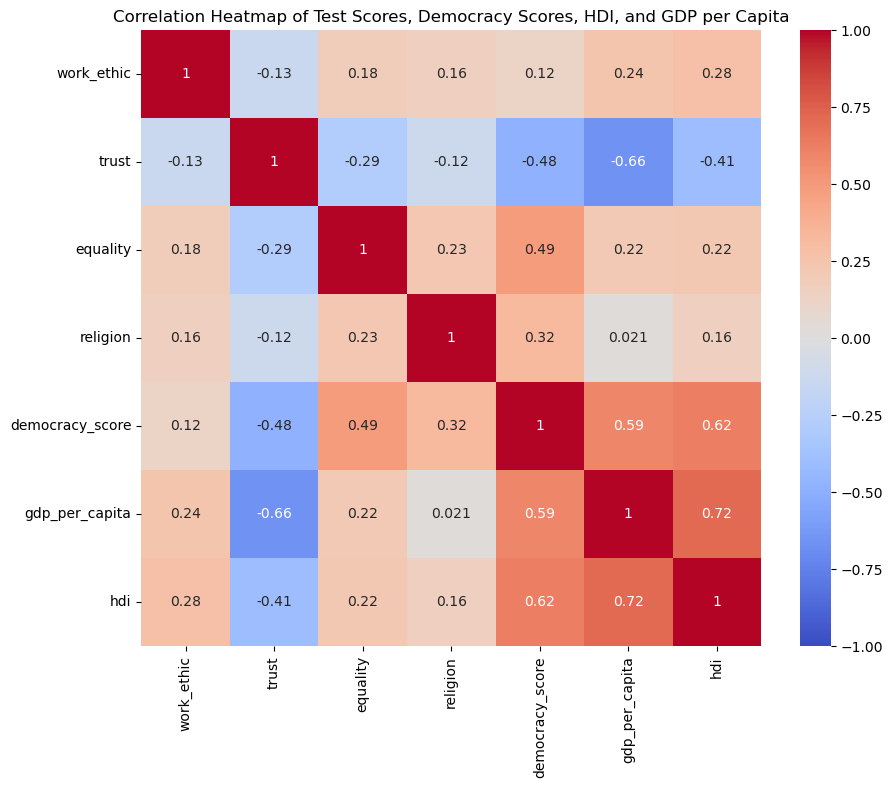

In [15]:
import seaborn as sns

# Select the relevant columns for correlation
correlation_data = wvs_data[['work_ethic', 'trust', 'equality', 'religion', 'democracy_score', 'gdp_per_capita', 'hdi']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Test Scores, Democracy Scores, HDI, and GDP per Capita')
plt.savefig('figures/corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Biggest Takeaways

Generally, trends that involve our controls have already been measured and studied. However, we note that GDP is very right-skewed, HDI is more uniform but somewhat left skewed and democracy score is almost uniform. 

Work ethic trust equality and religion all are approximately normally distributed. Among our four scores, trust is the one most correlated to the our controls. 

Then, we notice that within the four scores we see the highest absolute correlation between trust and equality and a relatively low correlation value amongst the other pairs. 

The lowest abosolute correlation pair overall is religion and GDP, and within the four world values scores it is religion and trust.

Because our histograms plot data over time we can see in the broadest sense stability or instability of our metrics through the three waves. GDP per capita is the most stable of any predictor. HDI is also mostly stable but (almost) everywhere increasing.

The most sizable shifts occur within trust over our three waves. Becuase it is highly correlated with a couple of other factors, it may be a potentially insightful predictor for us. 